In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('CarPrice_Assignment.csv', index_col='car_ID')
pd.set_option('display.max_columns', 50)

In [3]:
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [72]:
companyname = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(2,"companyname",companyname)
df.drop(['CarName'],axis=1,inplace=True)

In [73]:
df.head(5)

,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [75]:
lower= df['companyname'].apply(lambda x : x.lower())

In [76]:
def replace(a,b):
    df.companyname.replace(a,b, inplace = True)
    
    
replace('maxda','mazda')
replace('Nissan','nissan')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vw','volkswagen')
replace('vokswagen','volkswagen')

In [77]:
df.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [78]:
#Checking for duplicates
df.loc[df.duplicated()]

,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,


In [79]:
categorical = [i for i in df.columns if df[i].dtype =='O']
numerical = [i for i in df.columns if df[i].dtype !='O']
print('we have {} numerical columns : {}'.format(len(numerical),numerical))
print(' ')
print('we have {} categorical columns:  {}'.format(len(categorical),categorical))

we have 15 numerical columns : ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
 
we have 10 categorical columns:  ['companyname', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


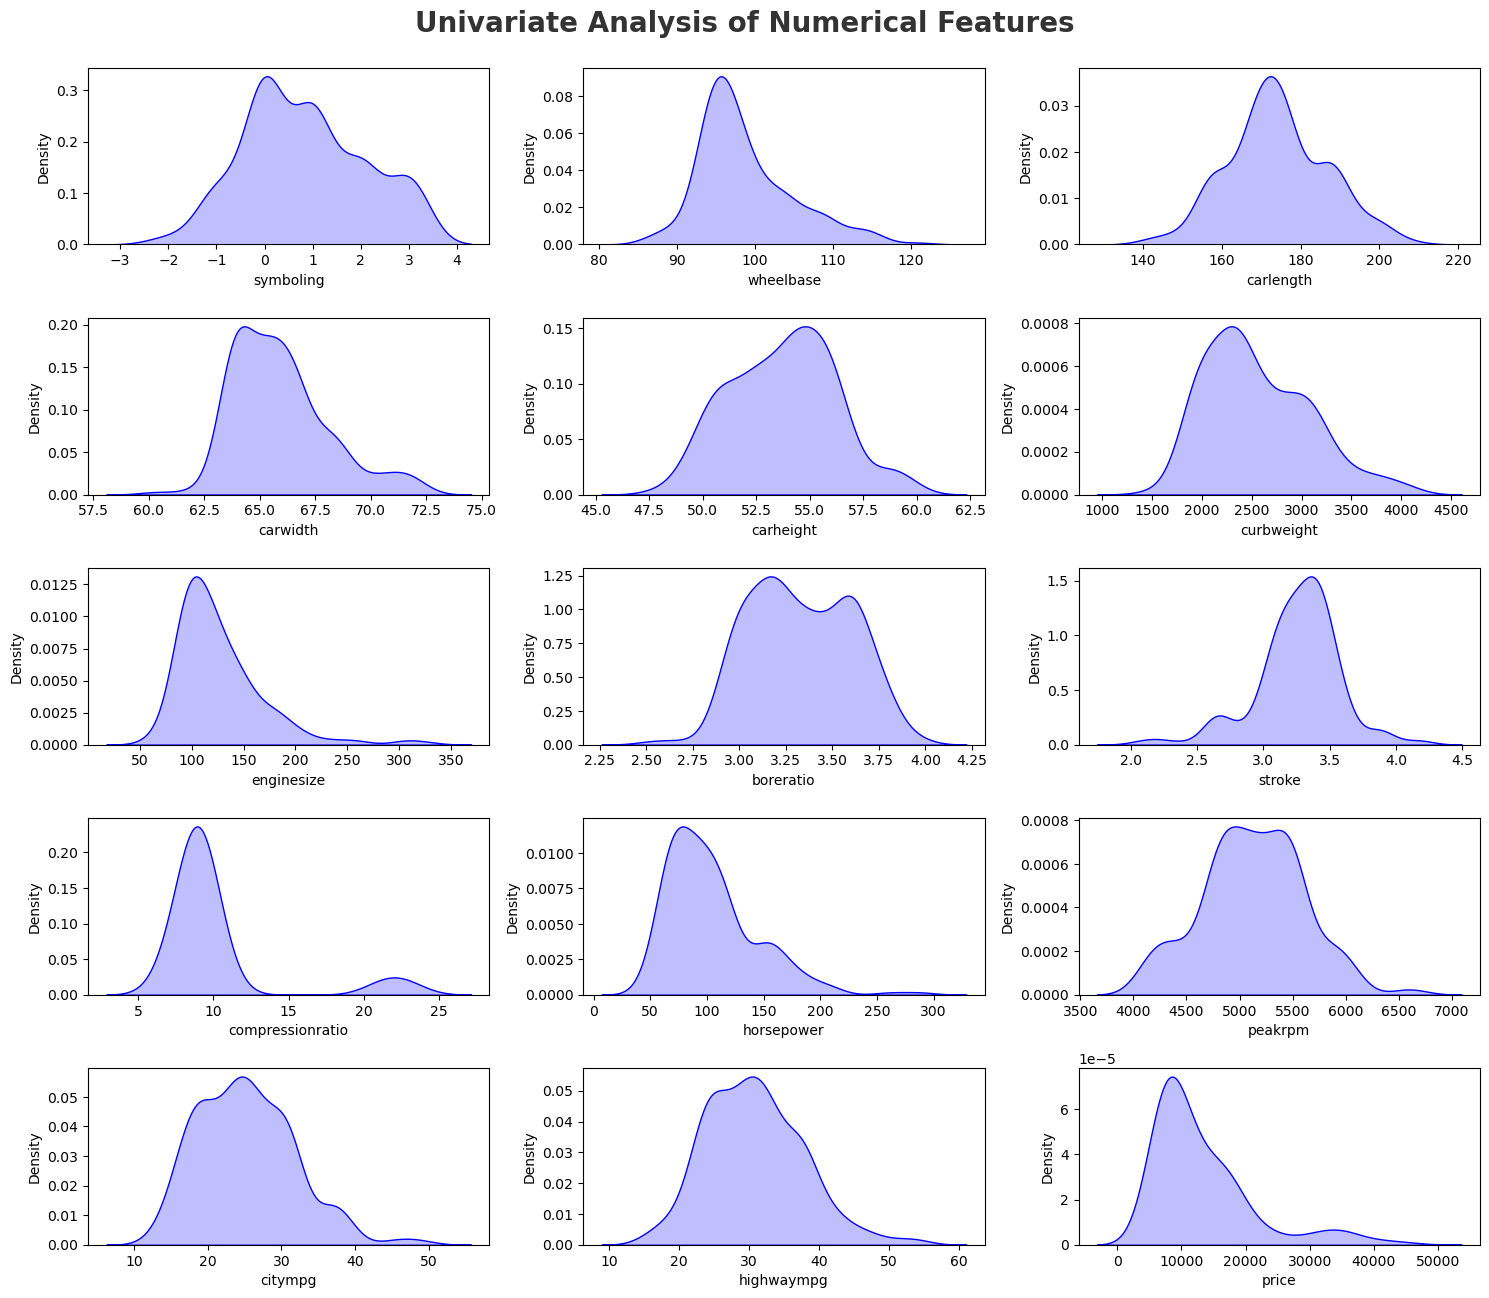

In [80]:
#Numerical columns

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha= 0.8, y=1.)

for i in range(0, len(numerical)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=df[numerical[i]],shade=True, color='b')
    plt.xlabel(numerical[i])
    plt.tight_layout()

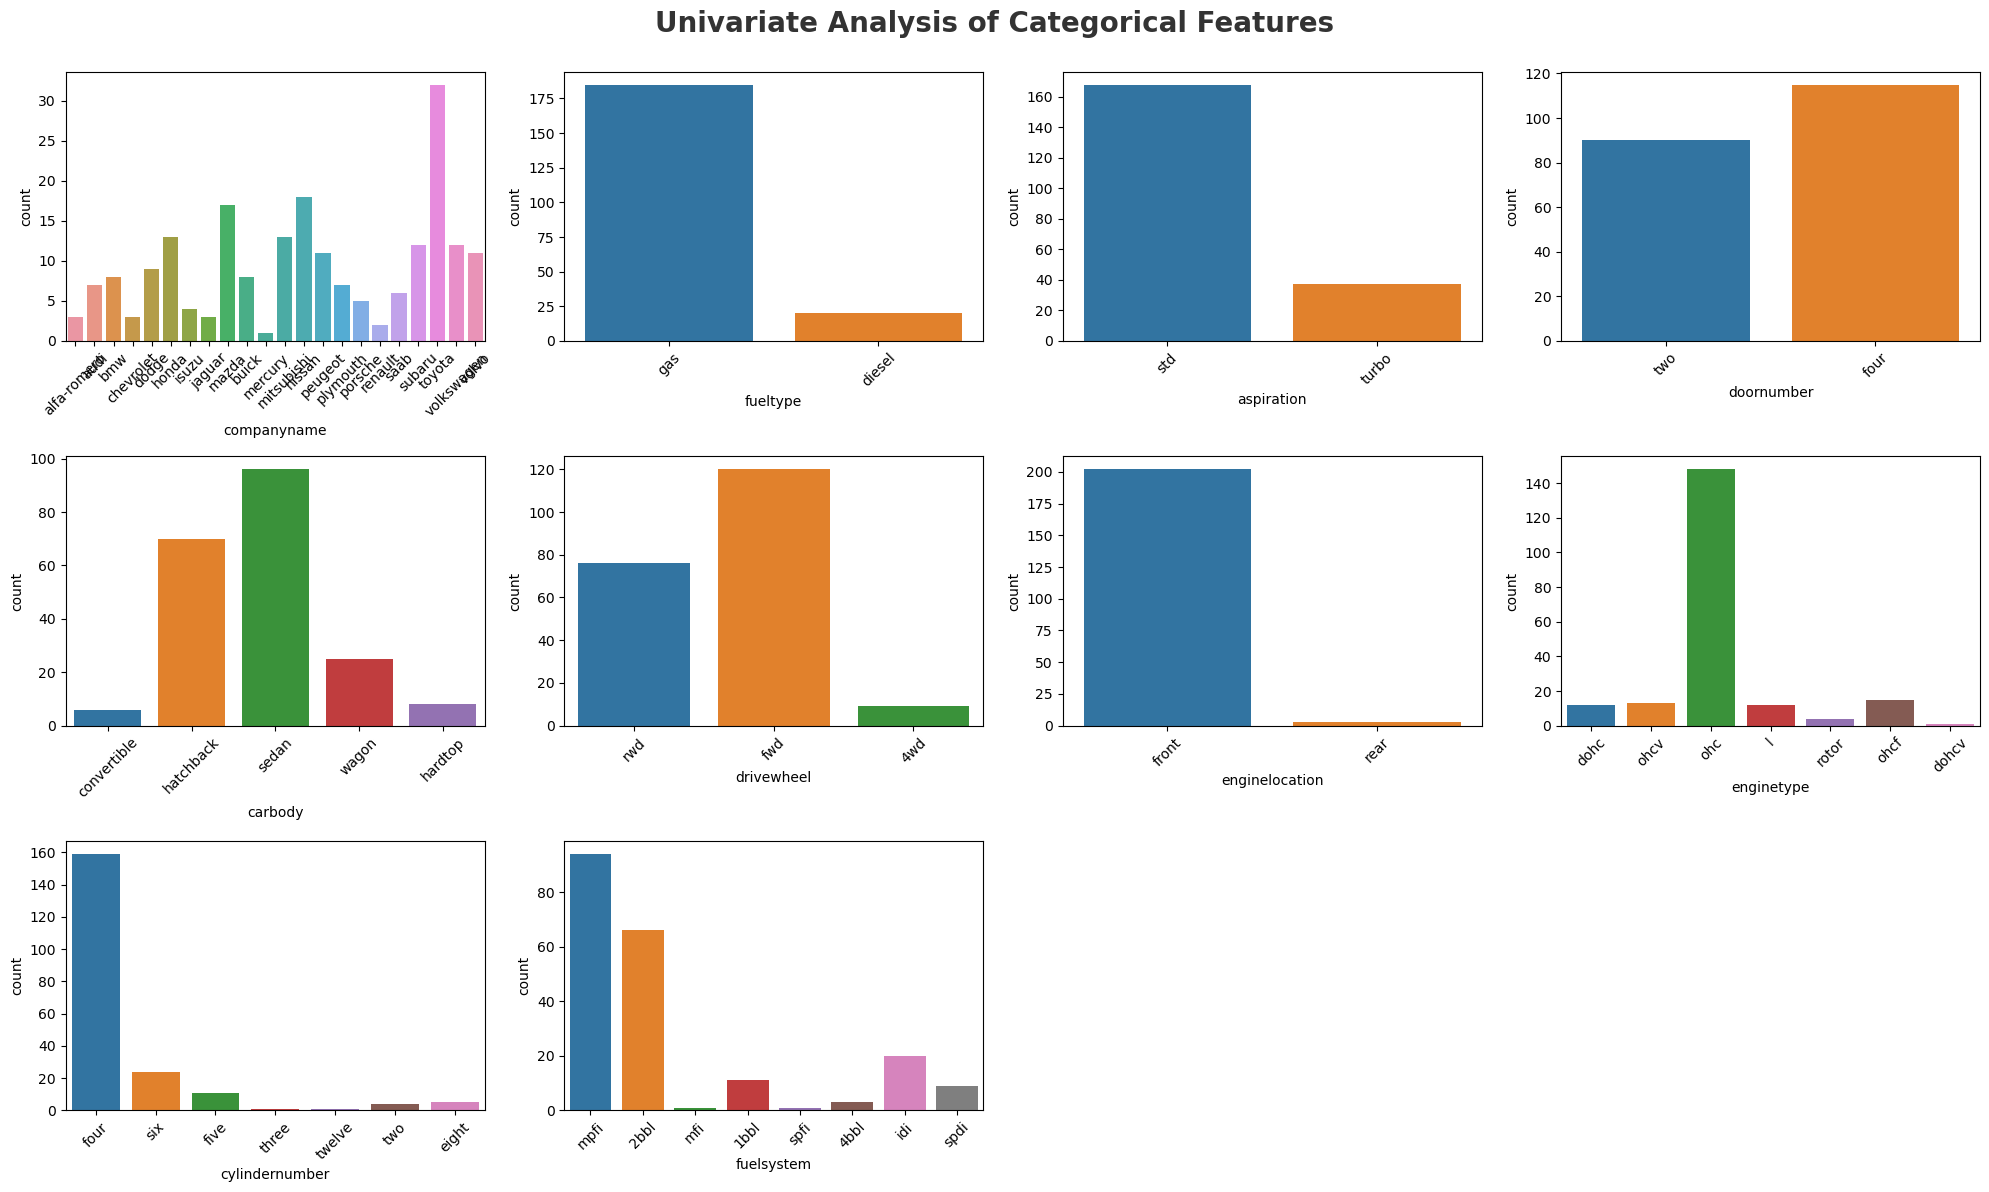

In [81]:
# categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=df[categorical[i]])
    plt.xlabel(categorical[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# BIVARIATE ANALYIS

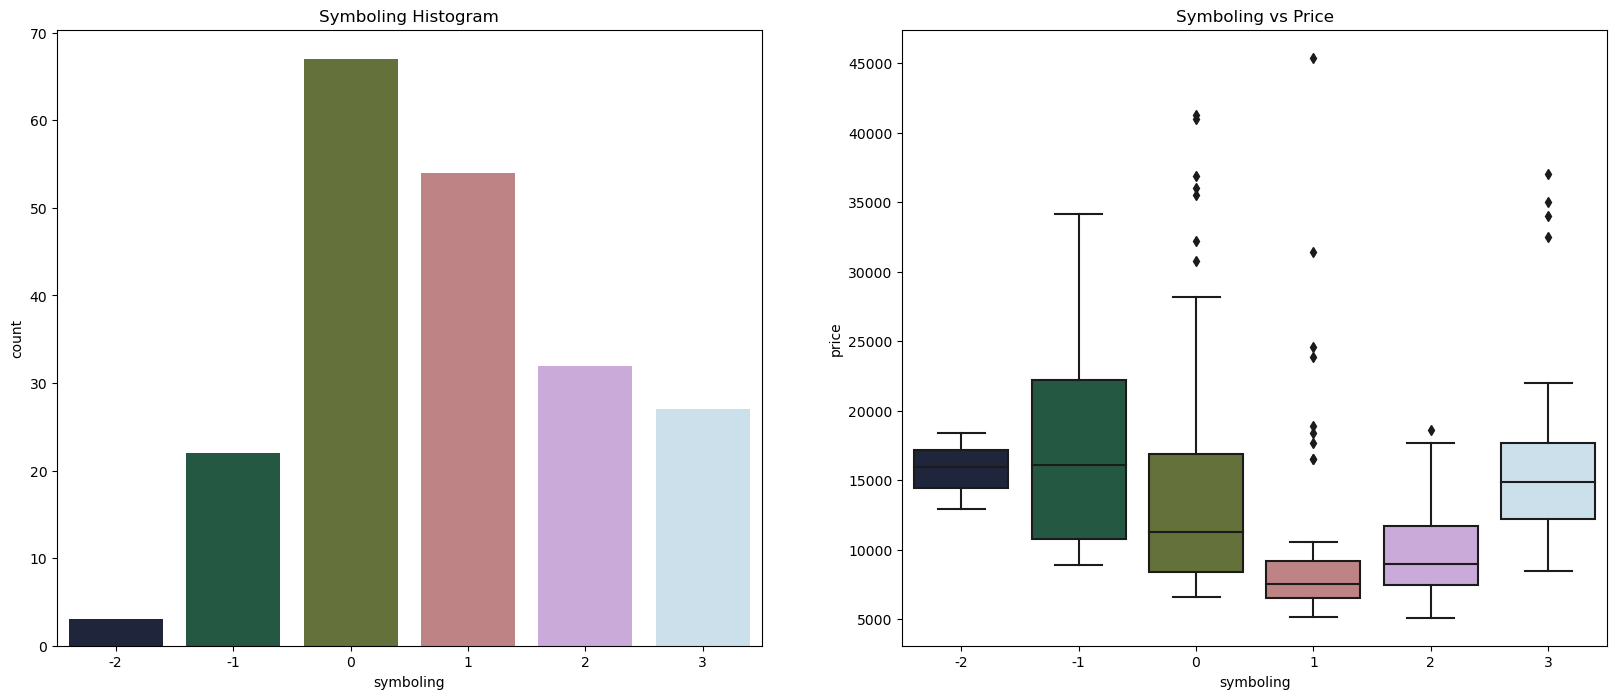

In [82]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

Inference :

    It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

    The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1

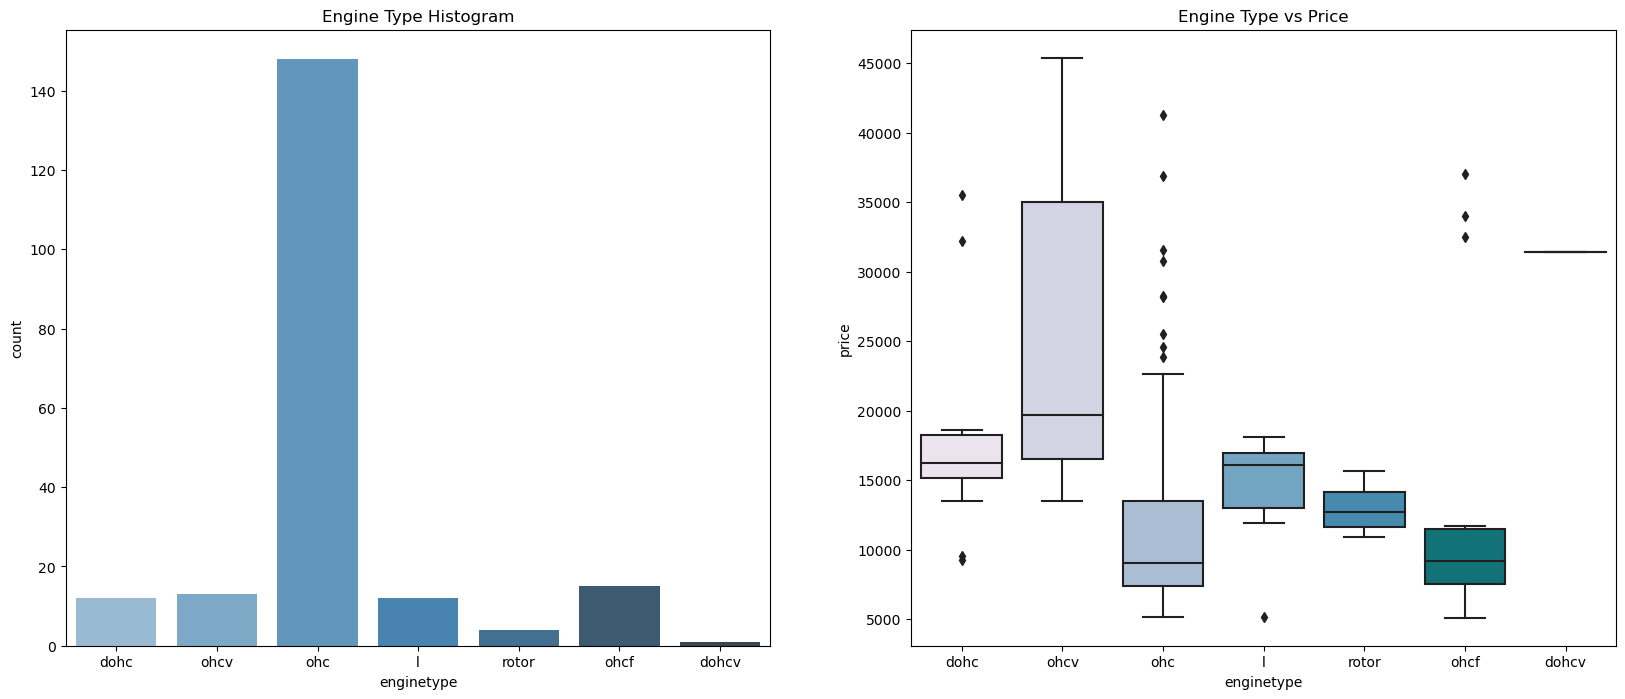

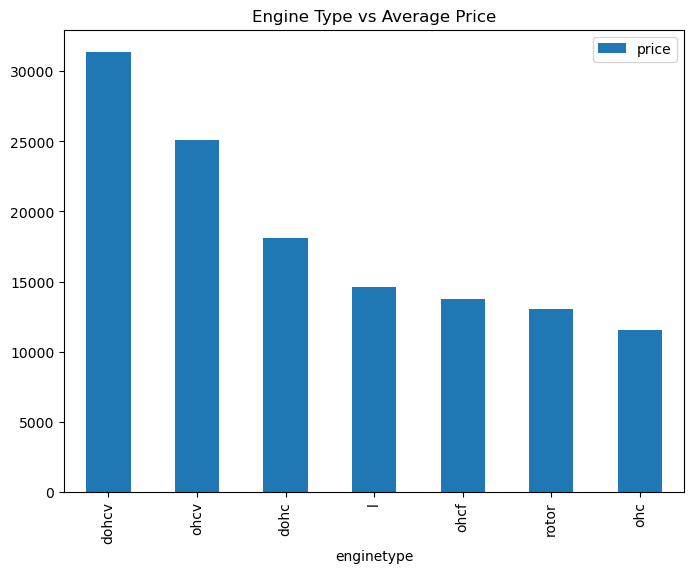

In [83]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

Inference :

    ohc Engine type seems to be most favored type.
    ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range

<Figure size 2500x600 with 0 Axes>

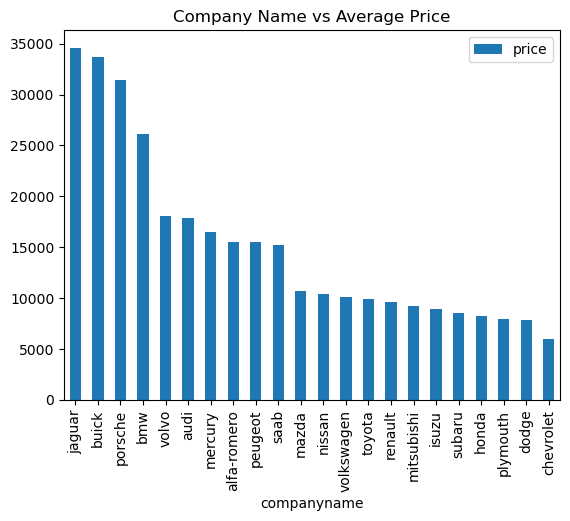

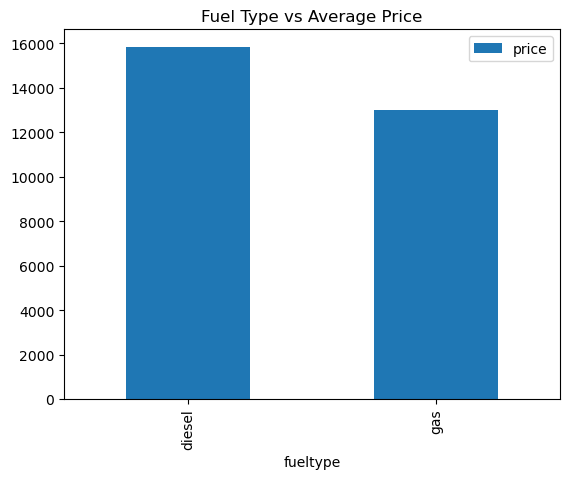

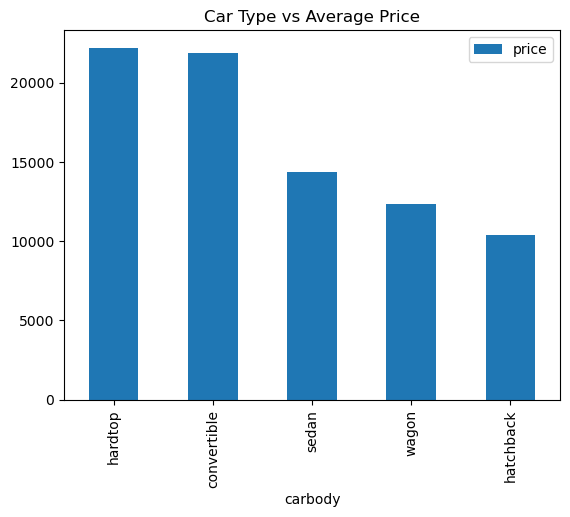

In [84]:
plt.figure(figsize=(25, 6))

a = pd.DataFrame(df.groupby(['companyname'])['price'].mean().sort_values(ascending = False))
a.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

b = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
b.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

c = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
c.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference :

    Jaguar and Buick seem to have highest average price.
    diesel has higher average price than gas.
    hardtop and convertible have higher average price.

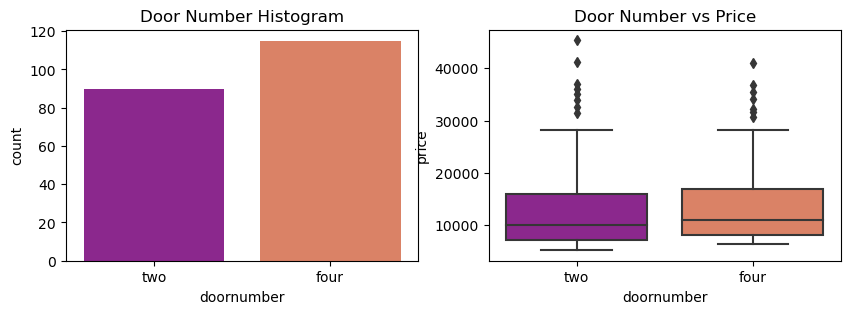

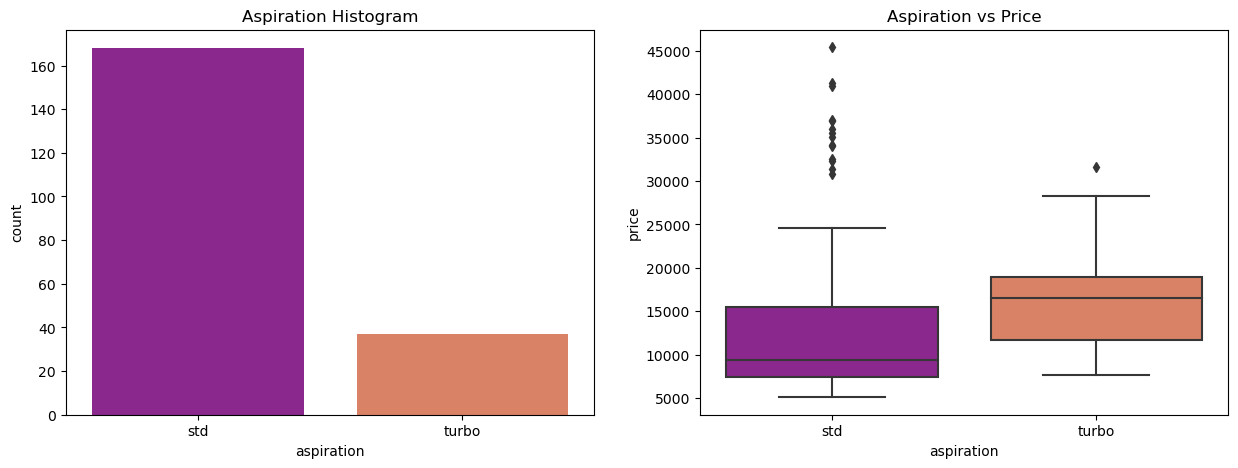

In [85]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()


Inference :

    doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
    It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

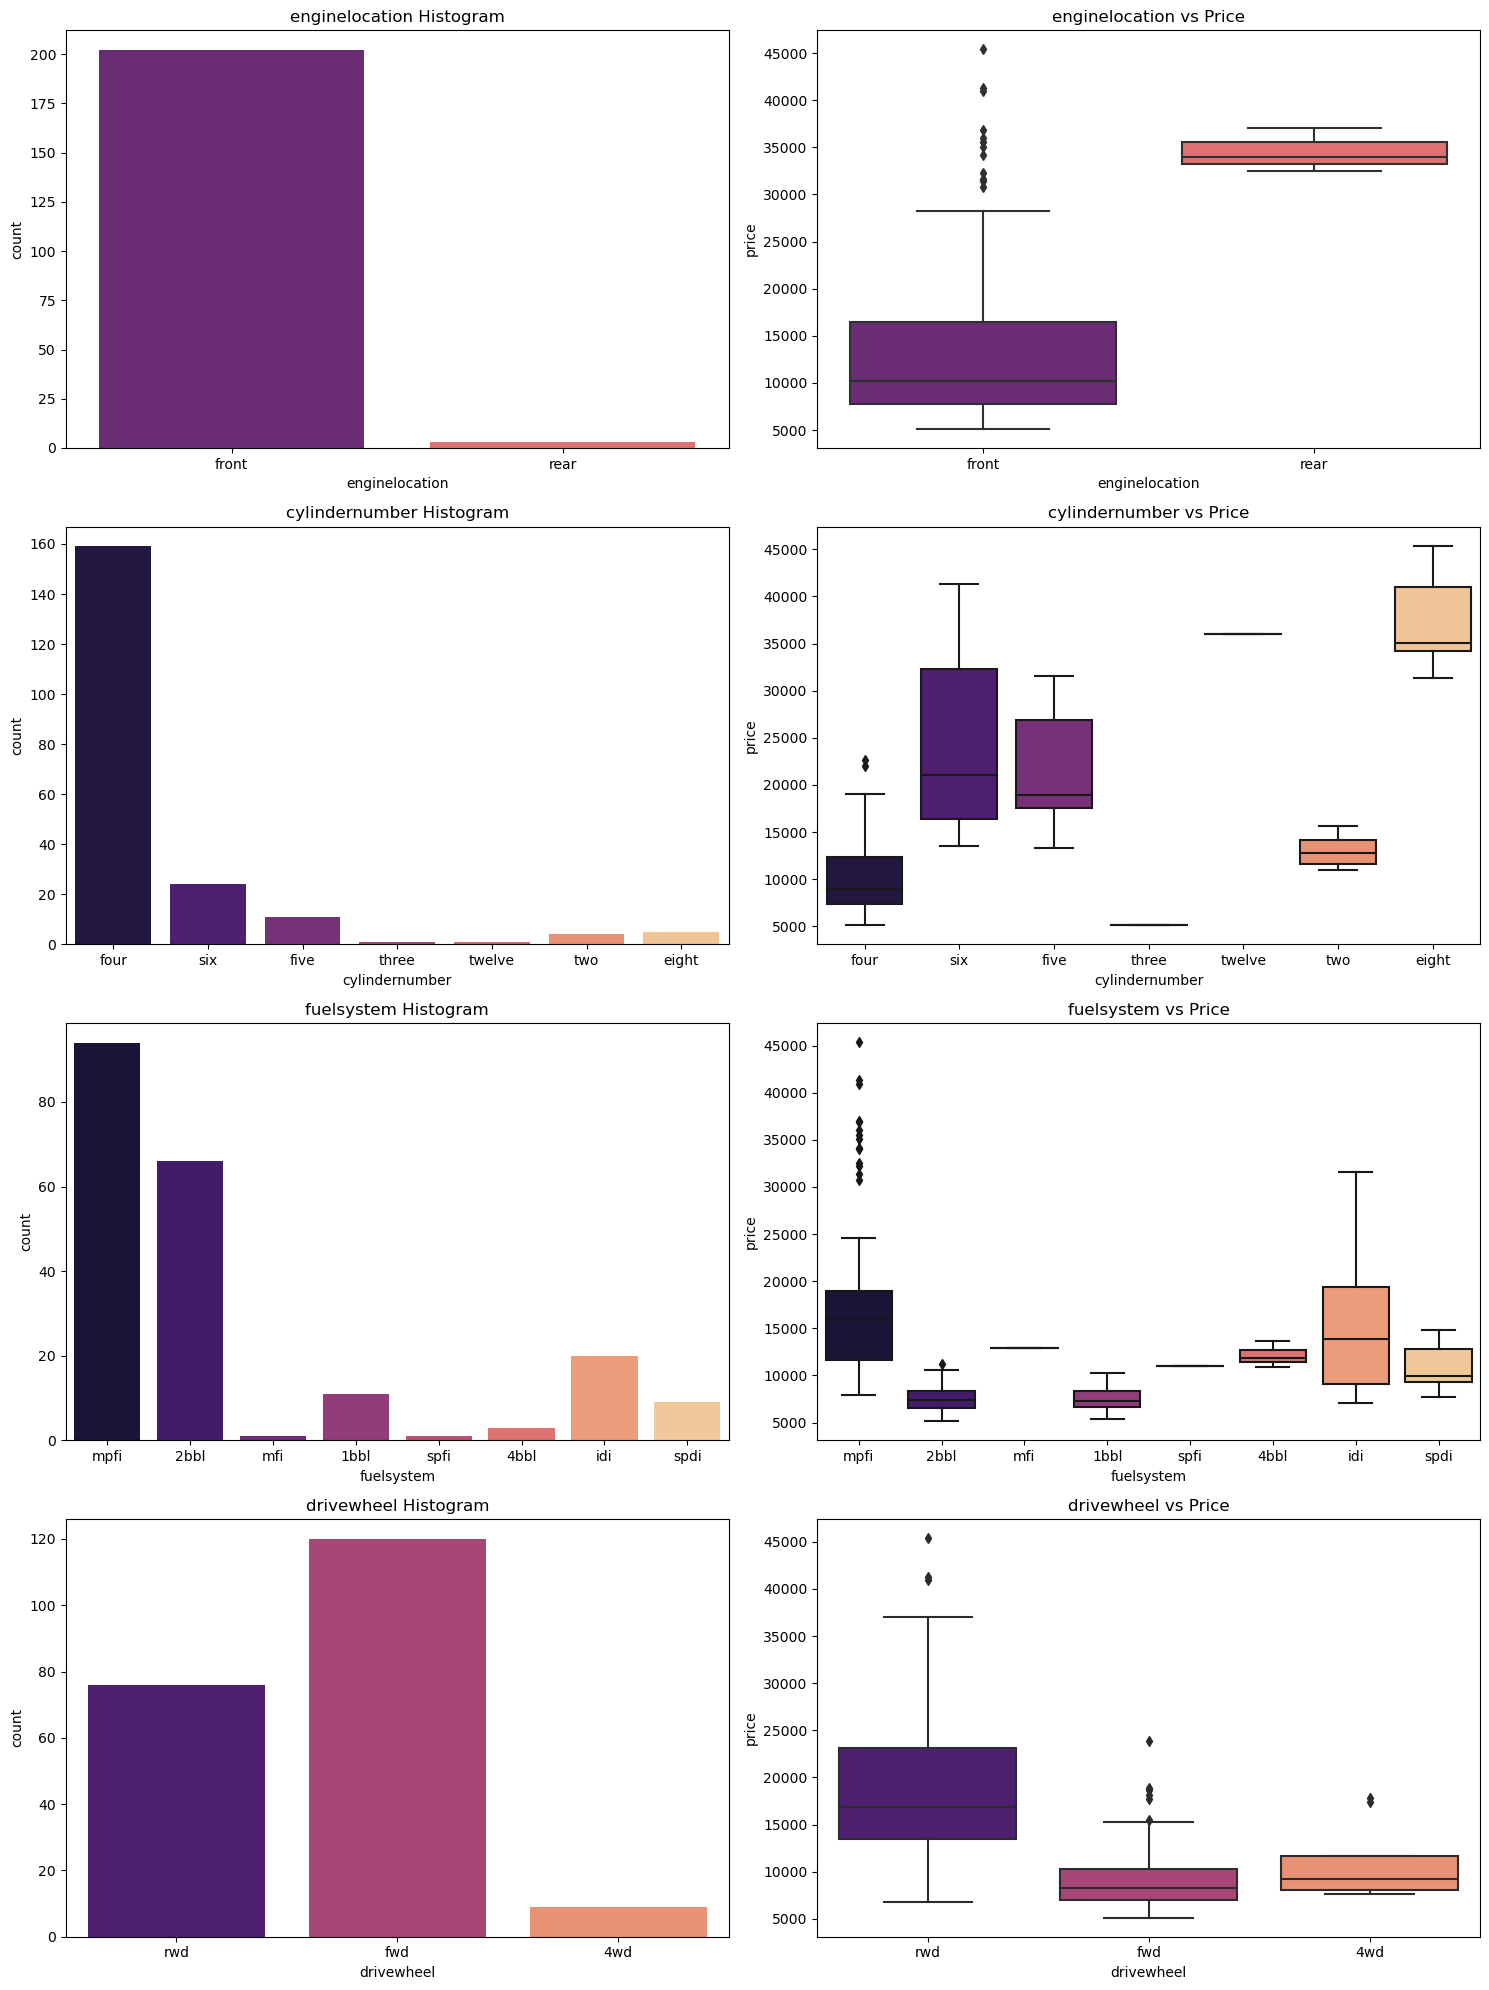

In [86]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Inference :
    
    Very few datapoints for enginelocation categories to make an inference.
    
    Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
    
    mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for     other categories to derive any meaningful inference.
    
    A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

# Visualising numerical data

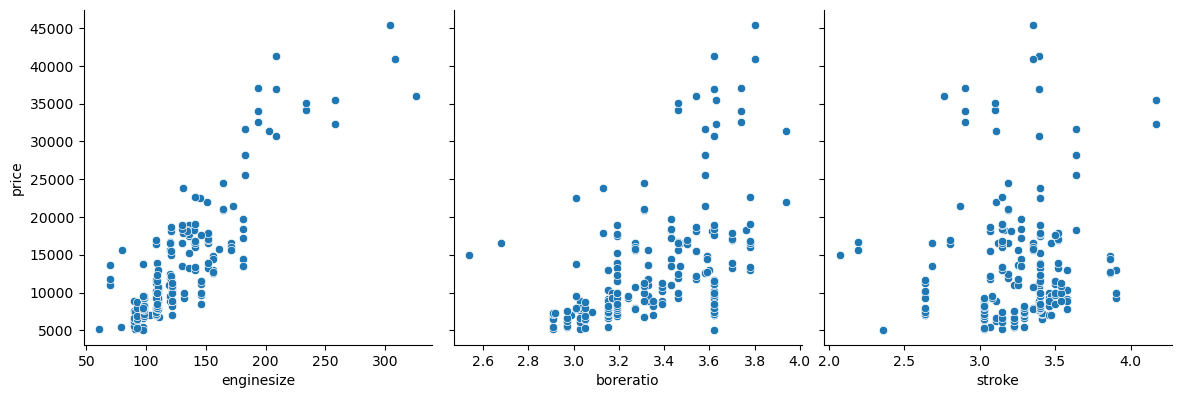

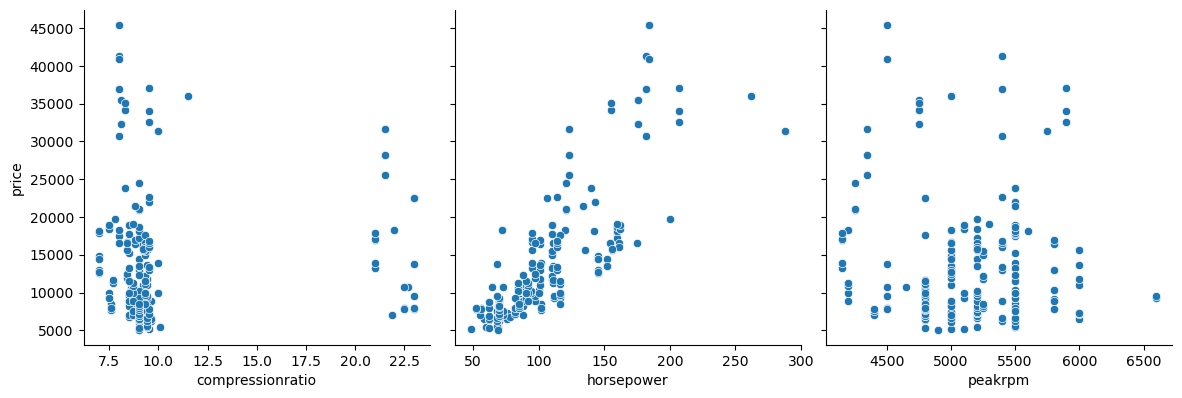

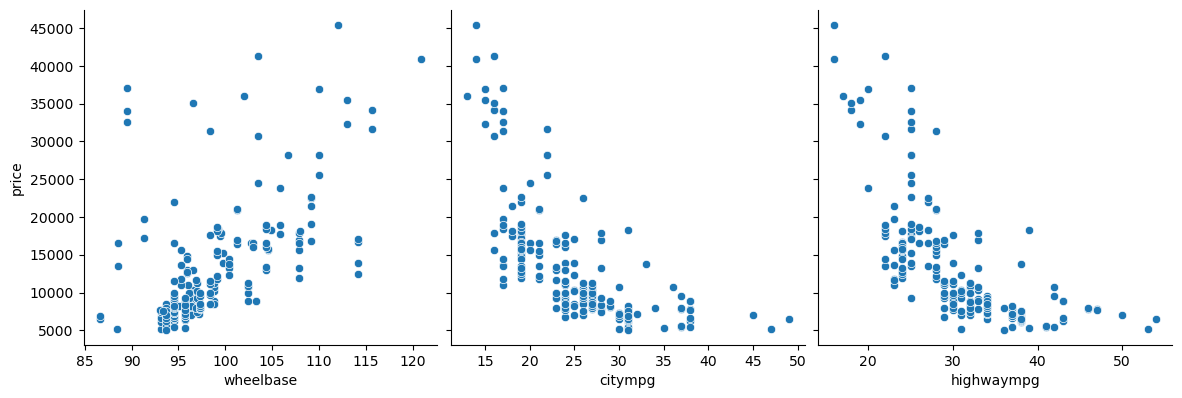

In [87]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

Inference :

    enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
    citympg, highwaympg - seem to have a significant negative correlation with price.
    List of important feature after viual analysis :-




List of important feature after viual analysis :-

- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 



In [88]:
df.head(5)

,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [89]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

bins = [0, 10000, 20000, 40000]
labels = ['Budget', 'Medium', 'Highend']
df['carsrange'] = (
    df.assign(companyname=df['companyname'].str.strip()) 
        .groupby('companyname')['price']
        .transform(lambda x: pd.cut(x, bins=bins, labels=labels, include_lowest=True))
)


In [90]:
df.head(5)

,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Medium
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium


In [94]:
def dummies(cols, df):
    for col in cols:
        temp = pd.get_dummies(df[col], drop_first=True)
        df = pd.concat([df, temp], axis=1)
        df.drop([col], axis=1, inplace=True)
    return df

cat_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'carsrange','fuelsystem','enginelocation']
newdf = dummies(cat_cols, df)

In [95]:
newdf.head(5)

,symboling,companyname,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,rear
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,3,alfa-romero,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,alfa-romero,two,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,2,audi,four,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5,2,audi,four,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [101]:
newdf.shape

(205, 44)

In [98]:
newdf.drop(['boreratio','stroke','compressionratio'],axis=1,inplace = True)

In [102]:
newdf.drop('companyname',axis=1,inplace = True)

In [103]:
from sklearn.model_selection import train_test_split

X = newdf.iloc[:,0:]
y = newdf.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler


num_cols = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',   'horsepower', 'peakrpm', 'citympg', 'highwaympg']


ordinal_transformer = OrdinalEncoder()

minmax_transformer = MinMaxScaler()


preprocessor = ColumnTransformer(
    transformers=[
        
        
        ('num_scaler', minmax_transformer, num_cols)
    ])

In [107]:
xtrain_processed = preprocessor.fit_transform(X_train)
xtest_processed = preprocessor.transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [109]:
lr.fit(xtrain_processed,y_train)

LinearRegression()

In [111]:
y_pred = lr.predict(X_test)

ValueError: could not convert string to float: 'four'